In [1]:
import numpynn as nn
import numpy as np

In [2]:
from sklearn.datasets import load_digits

X,y = load_digits(return_X_y = True)

y_5 = (y == 5) * 1.
y_5 = y_5.reshape(1, 1797)

X_new = X.reshape(64, 1797)

In [28]:
def run_nn(X, Y, epochs=100, learning_rate=.01):
    n_X = X.shape[0]
    n_y = Y.shape[0]
    weights = {'positive' : 1.8,
               'negative' : .2}
    
    layer_dims = np.array([n_X, 24, n_y])
    np.random.seed(1234)
    parameters = nn.initialize_weights(layer_dims)
    costs = []
    
    for epoch in range(epochs):
        y_hat, cache = nn.forward_propagation_L_layers(X, parameters)
        #print(y_hat.shape, Y.shape)
        assert y_hat.shape == Y.shape
        cost = nn.logistic_cost(y_hat, Y, weights)
        costs.append(cost)
        #print(cost)
        grads = nn.back_propagation(Y, cache, parameters, weights)
        parameters = nn.update_params(parameters, grads, learning_rate)
    
    return parameters, costs

In [29]:
parameters, costs = run_nn(X_new, y_5, epochs=12000, learning_rate=.01)

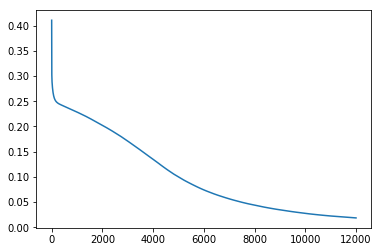

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.squeeze(costs))

In [31]:
m = y_5.shape[1]
y_hat, _ = nn.forward_propagation_L_layers(X_new, parameters)

tp = np.sum((y_5 == 1) * (y_hat > .5))
tn = np.sum((y_5 == 0) * (y_hat < .5))
pos = np.sum(y_5 == 1)
neg = np.sum(y_5 == 0)

pos_accuracy = tp / pos
neg_accuracy = tn / neg

print("Proportion Correct Positive:", pos_accuracy)
print("Proportion Correct Negative:", neg_accuracy)
print("Overall Accuracy:", (tp + tn)/(pos + neg))

Proportion Correct Positive: 1.0
Proportion Correct Negative: 0.9882352941176471
Overall Accuracy: 0.9894268224819143
